# Testing MCMC algo.

- metropolis-hastings algo.
- gibbs algo.


In [101]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [29]:
np.random.seed(1234)
x = np.random.normal(size=20) * 2 + 1
n_rep = 10000
n_accept = 0
theta = np.empty(shape=(2, n_rep))

In [39]:
sp.stats.norm(loc=theta[0, 0], scale = np.exp(theta[1, 0])).pdf(x=1000)

0.0

In [70]:
theta.shape

(10000, 2)

## MH algo.

In [96]:
## metropolis-hastings

ll0 = np.log(sp.stats.norm(loc=theta[0,0], scale=theta[1,0]).pdf(x)).sum()
for i in range(1, n_rep):
    theta[i,:] = theta[i-1,:] + sp.stats.t(df=3).rvs(2)*.5
    ll1 = np.log(sp.stats.norm(loc=theta[i,0], scale=theta[i,1]).pdf(x)).sum()

    if np.exp(ll1 - ll0) > sp.stats.uniform().rvs(1):
        ll0 = ll1
        n_accept += 1
    else: 
        theta[i,:] = theta[i-1,:] 

n_accept/n_rep

/var/folders/1f/8r50hwmn6m5dwrngfgysq4p40000gn/T/ipykernel_17196/1128727989.py:4: RuntimeWarning: divide by zero encountered in log
  ll1 = np.log(sp.stats.norm(loc=theta[i,0], scale=theta[i,1]).pdf(x)).sum()


0.4167

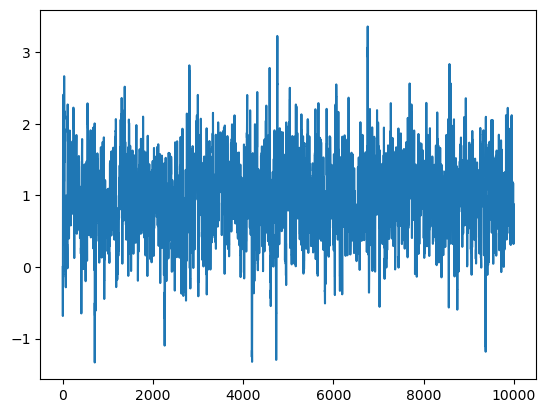

In [117]:
## μ
plt.plot(np.arange(n_rep), theta[:,0], )


(array([1.000e+00, 0.000e+00, 5.000e+00, 1.092e+03, 4.691e+03, 3.080e+03,
        8.790e+02, 1.930e+02, 3.800e+01, 2.100e+01]),
 array([2.16012425e-314, 4.75468932e-001, 9.50937863e-001, 1.42640679e+000,
        1.90187573e+000, 2.37734466e+000, 2.85281359e+000, 3.32828252e+000,
        3.80375145e+000, 4.27922038e+000, 4.75468932e+000]),
 <BarContainer object of 10 artists>)

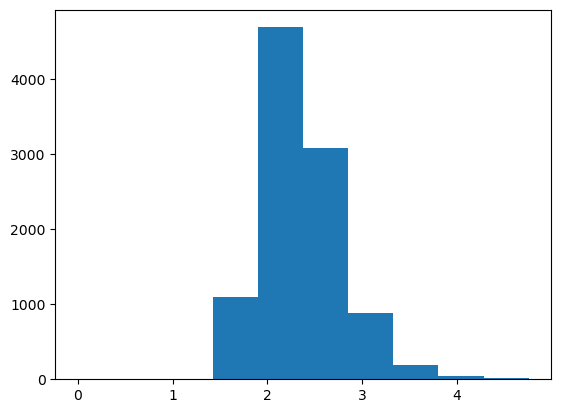

In [120]:
plt.hist(theta[:,1])

In [165]:
np.random.seed(1234)
x = np.random.normal(size=20) * 2 + 1
n_rep = 10000
n_accept = 0
theta = np.empty(shape=(2, n_rep))

## Gibbs algo.

In [174]:
## gibbs
n = 20
a = 1
b = 0.1
c = 0
d = 100
x_bar = x.mean()
phi = 1
mu = 0
theta[:,0] = [mu,phi]
for i in range(1, n_rep):
    mu = sp.stats.norm(loc=(d*n*x_bar + phi*c) / (d*n + phi), scale = np.sqrt(phi*d / (d*n + phi))).rvs(1)
    phi = 1/sp.stats.gamma(n/2+a-1, np.sum(((x-mu)**2)/2 + b)).rvs(1)
    theta[:,i] = np.array([mu, phi]).flatten()

n_accept/n_rep

0.0

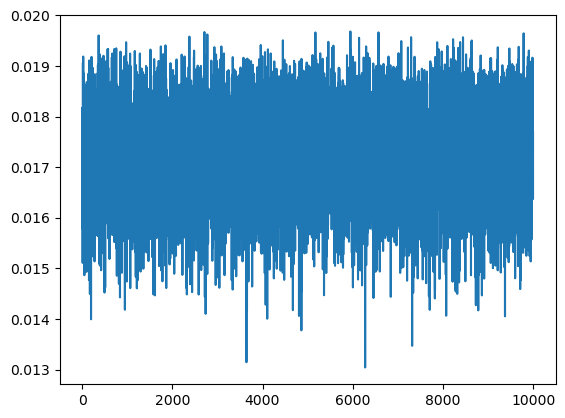

In [180]:
plt.plot(theta[1, 1:])

In [ ]:
## gibbs
n = 20
a = 1
b = 0.1
c = 0
d = 100
#x_bar = x.mean()
n_accept = 0
phi = 1
mu = 0
theta[:,0] = [mu,phi]
for i in range(1, n_rep):
    
    phi = 1/sp.stats.gamma(n/2+a-1, np.sum(((x-mu)**2)/2 + b)).rvs(1)
    theta[:,i] = np.array([mu, phi]).flatten()

n_accept/n_rep